# Example how to use random retrieval for distributions

In [1]:
import sys
from sgqlc.operation import Operation
from pdp_schema import pdp_schema as schema
from pdp_graphql_client_python import client

In [2]:
# fetch environment variable with PDP endpoint API address
! echo "${PDP_API}"

https://graphql-api.pdp.int.srgssr.ch/graphql


In [3]:
# show available queries
schema.Query

type Query {
  faroProgramPage(first: Int!, after: String): FaroProgramPage!
  faroPrograms(ids: [String!]!): [FaroProgram]!
  randomFaroPrograms: [FaroProgram!]!
  faroItemPage(first: Int!, after: String): FaroItemPage!
  faroItems(ids: [String!]!): [FaroItem]!
  faroItemsByPlayUrn(urns: [String!]!): [FaroItem]!
  faroItemsByPlayUrnGraphDb(urns: [String!]!): [FaroItem]!
  randomFaroItems: [FaroItem!]!
}

In [4]:
# retrieve query operations
op = Operation(schema.Query)

In [5]:
type(op)

sgqlc.operation.Operation

In [6]:
# return current query (empty)
op

query {
}

In [7]:
# select random faro item query (underscore)
faro = op.random_faro_items()

In [8]:
# return current query (empty)
op

query {
  randomFaroItems {
    id
    programId
    itemNr
    rights
    isPoisonous
    playMedias {
      id
      title
      urn
      description
    }
    mediaUrns
    playLinks
    descriptorPaths
    program {
      id
      bu
      mediaType
      episodeIds
      sTit
      sDatStart
      sGef
      pTit
      department
      workgroup
      seriesNr
    }
    bTit
    recordingDate
    ingestDate
    prodTypes
    producer
    licenseHolder
    abs
    fdes
    sportDoc {
      season
      sportEventPaths
      sportPaths
    }
    webCmsIds
  }
}

In [9]:
# return current query
op

query {
  randomFaroItems {
    id
    programId
    itemNr
    rights
    isPoisonous
    playMedias {
      id
      title
      urn
      description
    }
    mediaUrns
    playLinks
    descriptorPaths
    program {
      id
      bu
      mediaType
      episodeIds
      sTit
      sDatStart
      sGef
      pTit
      department
      workgroup
      seriesNr
    }
    bTit
    recordingDate
    ingestDate
    prodTypes
    producer
    licenseHolder
    abs
    fdes
    sportDoc {
      season
      sportEventPaths
      sportPaths
    }
    webCmsIds
  }
}

In [26]:
# constants
page_requests = 100

In [27]:
# init results
results = []

In [28]:
# download data
from tqdm.notebook import tnrange
for i in tnrange(page_requests, desc="Downloading data"):
    # query page
    data = client.run_query(op)
    
    # add results
    results += (op + data).random_faro_items

In [29]:
print(f'INFO - Retrieved {len(results):,} FaroItems')

INFO - Retrieved 1,000 FaroItems


## plot year distribution of retrieved data

In [14]:
results[0].program.s_dat_start

'2017-02-17'

In [15]:
from collections import Counter
from datetime import date

# count year occurrences
c = Counter(date.fromisoformat(x.program.s_dat_start).year for x in results if x.program.s_dat_start)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

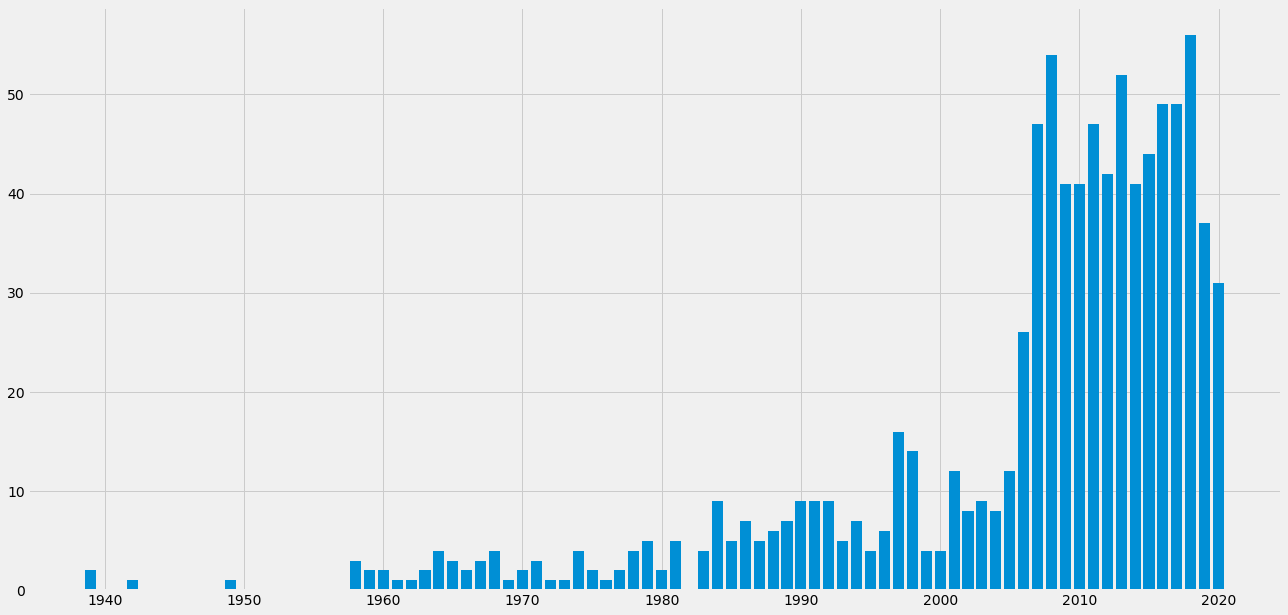

In [17]:
with plt.style.context('fivethirtyeight'):
    plt.bar(c.keys(), c.values())

## load data into pandas

In [18]:
import pandas as pd

In [19]:
results[0].__fields_cache__

OrderedDict([('id', id: String!),
             ('program_id', programId: String!),
             ('item_nr', itemNr: Int!),
             ('rights', rights: String!),
             ('is_poisonous', isPoisonous: Boolean!),
             ('play_medias', playMedias: [PlayMedia!]!),
             ('media_urns', mediaUrns: [String!]!),
             ('play_links', playLinks: [String!]!),
             ('descriptor_paths', descriptorPaths: [String!]!),
             ('program', program: FaroProgram),
             ('b_tit', bTit: String),
             ('recording_date', recordingDate: String),
             ('ingest_date', ingestDate: String),
             ('prod_types', prodTypes: [String!]!),
             ('producer', producer: String),
             ('license_holder', licenseHolder: String),
             ('abs', abs: String),
             ('fdes', fdes: String),
             ('sport_doc', sportDoc: FaroSportDoc!),
             ('web_cms_ids', webCmsIds: [String!]!)])

In [20]:
# todo: find better way to import data into pandas
df = pd.DataFrame([x.__json_data__ for x in results])

In [21]:
df

,program,mediaUrns,fdes,bTit,ingestDate,isPoisonous,descriptorPaths,itemNr,rights,prodTypes,playLinks,sportDoc,recordingDate,id,webCmsIds,programId,abs,licenseHolder,producer,playMedias
0,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],None,SRF Virus 17.02.2017 02 - 03 Uhr,None,False,[],0,,[],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,fb426dae-94d9-4723-933e-97f3a380e0d4,[],58db22cc-0a36-49f1-94f1-43fea23f3c36,None,None,None,[]
1,"{'sGef': 'WM-Magazin', 'sTit': None, 'mediaTyp...",[],None,Quiz Le Roi du Jeu,None,False,[],10,Rechte bei SRF/SRG,[Eigenproduktion UE],[],"{'season': None, 'sportEventPaths': ['¦int¦Wel...",None,fb427416-75c8-4a2b-8d83-620d5a878a5b,[],92cbc05a-8454-4502-9e88-2afa14e5e0d0,"Schweiz <TVZH: Fussball-WM 1998 \/ Quiz \""Le R...",None,DRS,[]
2,{'sGef': 'Tagesschau - Téléjournal - Telegiorn...,[],None,None,None,False,[¦POLITIK.¦WAHL¦WAHLKAMPF¦],4,freie Verwendung SRG-intern,[Einkauf],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,fb427a18-4d34-4886-b17d-ba1bc8dd558f,[],c22de872-0d0b-4e26-9bbb-5e83e4f2c92d,Belgien <Brüssel: Parlaments-Wahlkampf,None,Agenturen,[]
3,"{'sGef': 'Ratgeber', 'sTit': None, 'mediaType'...",[urn:srf:audio:f146aa6b-d948-43ad-92b6-80b7c1e...,None,Bergwanderung - vor der Wanderung eine Checkli...,None,False,"[¦SENSATION.¦UNFALL¦, ¦UMWELT.¦WETTER¦, ¦FREIZ...",0,Rechte bei SRF/SRG,[Eigenproduktion UE],[http://srf.ch/play/radio/redirect/detail/f146...,"{'season': None, 'sportEventPaths': [], 'sport...",None,fb42968b-6b55-4ae9-a418-626d3cf65eab,[f146aa6b-d948-43ad-92b6-80b7c1e67b53],07b15457-3ba3-4581-b650-3cd81c7095d7,Aus Online-Text: Im Sommer gehört Wandern zu d...,SRF,SRF,[]
4,"{'sGef': 'EVN/News-Agenturmaterial', 'sTit': N...",[],None,Stadt Taiz im Bergland des Jemen,None,False,[¦MENSCH.¦ALLTAG¦],0,freie Verwendung SRG-intern,[Einkauf],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,fb429b69-ea39-4161-a16a-ca88000172fe,[],d3e2611c-baed-4962-a44b-96a8b4f589f9,Jemen <Taiz: Rushes Innenstadt,ASSOCIATED PRESS,ASSOCIATED PRESS,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],None,SRF 4 News 25.02.2012 15 - 16 Uhr,None,False,[],0,,[],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,72896b69-c16a-49cf-9b2d-6fb1eb9e4253,[],579db74a-7f2a-4829-9a02-a6a309ab512a,None,None,None,[]
996,"{'sGef': 'Sport aktuell (Spak)', 'sTit': None,...",[urn:srf:video:89705895-5d3d-4890-9446-5d94d49...,None,Fussball \/ Kollers erste Wochen,None,False,[],4,Rechte bei SRF/SRG,[Eigenproduktion UE],[http://srf.ch/play/tv/redirect/detail/8970589...,"{'season': None, 'sportEventPaths': [], 'sport...",None,72898167-29cd-4ec3-928e-e05186d8cfb6,[89705895-5d3d-4890-9446-5d94d49e7fc8],12d8cd9a-f157-4ac1-aee8-e9fd83cfa2b6,"Österreich: Fussball Herren \/ Marcel Koller, ...",SRF,SRF,[]
997,"{'sGef': 'Tagesschau Hauptausgabe (TS)', 'sTit...",[urn:srf:video:4a264fce-754c-4560-865b-3a4adc9...,None,None,None,False,[¦TECHNIK.¦ENGINEERING¦],7,Rechte bei SRF/SRG,[Eigenproduktion UE],[http://srf.ch/play/tv/redirect/detail/4a264fc...,"{'season': None, 'sportEventPaths': [], 'sport...",None,7289893b-8a9b-4a9f-bd9d-22fea239fc69,[],b471c11f-6994-453d-b325-3d7f454e85d7,"Schweiz: Projekt \""Swiss Engineering Network\""...",None,DRS,[]
998,"{'sGef': None, 'sTit': None, 'mediaType': 'aud...",[],None,SRF 1 15.04.2017 15 - 16 Uhr,None,False,[],0,,[],[],"{'season': None, 'sportEventPaths': [], 'sport...",None,72898a4d-aa51-4e3d-882a-fd6921f538cb,[],692e929d-570a-4e28-befc-a2399b2b2fe3,None,None,None,[]


## filter out most important producers and plot as pie chart

In [22]:
df.producer.describe()

count     455
unique     89
top       SRF
freq      135
Name: producer, dtype: object

<AxesSubplot:ylabel='producer'>

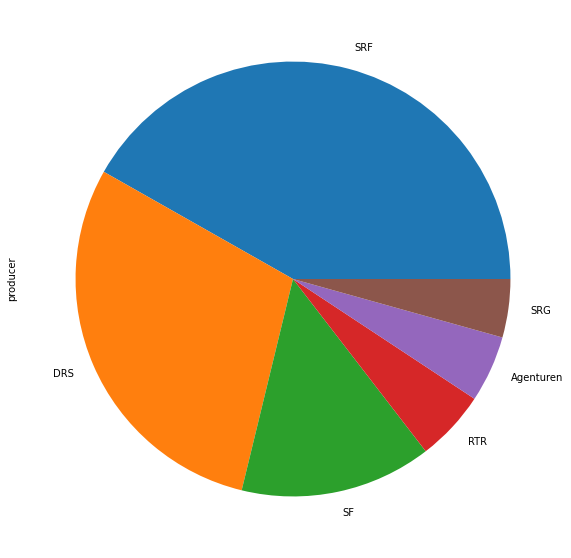

In [23]:
(df
 .groupby('producer')
 .filter(lambda x: len(x) > 10)
 .producer
 .value_counts()
 .plot
 .pie())

## filter out elements that contain the sportDoc entry

In [24]:
df2 = df.loc[pd.json_normalize(df.sportDoc).season.notna()]

In [25]:
df2

,program,mediaUrns,fdes,bTit,ingestDate,isPoisonous,descriptorPaths,itemNr,rights,prodTypes,playLinks,sportDoc,recordingDate,id,webCmsIds,programId,abs,licenseHolder,producer,playMedias
9,"{'sGef': 'Sport Live', 'sTit': None, 'mediaTyp...",[urn:srf:video:660f8ef0-8933-4330-8fcd-df2876e...,Sequenzen durch Livelogger bearbeitet,Rad Strassenrennen Rad Tour de France \/ 17. E...,None,False,[],0,Fremdrechte/ unklare Rechtesituation,[Übernahme / Programmaustausch],[http://srf.ch/play/tv/redirect/detail/660f8ef...,"{'season': '2018', 'sportEventPaths': ['¦int¦R...",None,fb42f008-0b2e-42ec-a770-3eab27077340,[],8a6a855d-5a01-4be7-830c-e46be57c699e,Frankreich <Col de Portet: Rad Strassenrennen ...,unbekannt,ASO,[]
17,"{'sGef': 'Sport aktuell (Spak)', 'sTit': None,...",[],None,Langlauf,None,False,[],7,Rechte bei SRF/SRG,[Eigenproduktion UE],[],"{'season': '1996', 'sportEventPaths': ['¦nat¦S...",None,4dcb7b11-4bc4-49eb-9daf-8b31a6197a11,[],3e81ba8e-e2e4-4b6b-b277-dc9f925d964b,"Schweiz <Klosters, GR: Langlauf 4x10km klassis...",None,DRS,[]
51,"{'sGef': 'Sportpanorama (Pano)', 'sTit': None,...",[],None,Tennis int US Open (Hartplatz) \/ Clip Wawrinka,None,False,[],10,Fremdrechte/ unklare Rechtesituation,[Eigenproduktion UE],[],"{'season': '2007', 'sportEventPaths': ['¦int¦G...",None,1d25ec61-d952-4851-907e-55389df67e95,[],04acf353-b884-438c-ab34-73438a155f48,USA <New York: Tennis int Grand Slam Turnier U...,unbekannt,SF,[]
123,"{'sGef': 'Sport Live Programm', 'sTit': None, ...",[],None,Wintersport Eishockey Weltmeisterschaft Vorrun...,None,False,[],0,"Fremdrechte/ unklare Rechtesituation, Rechte b...",[Eigenproduktion UE],[],"{'season': '2019', 'sportEventPaths': ['¦int¦W...",None,a3d8e1b7-6843-4867-8d6a-84c0f3bc291e,[],dcf05873-f120-48d0-89e1-c7b8aa018a6a,"Schweiz, TVZH, Slowakei, Bratislava: Winterspo...",unbekannt; SRF,SRF,[]
126,"{'sGef': 'Time out', 'sTit': None, 'mediaType'...",[],None,Eisschwimmen,None,False,[],4,Fremdrechte/ unklare Rechtesituation,[Eigenproduktion UE],[],"{'season': '2001', 'sportEventPaths': [], 'spo...",None,a3d8f430-383e-476f-9b96-41e730dbeac4,[],e668e5bd-b586-4276-9fe0-4b1d9bdfeb48,China <o.O.: Schwimmen \/ Wettkampf bei eisige...,None,Fremdproduktion,[]
170,"{'sGef': 'Sport Live Programm', 'sTit': None, ...",[],None,Leichtathletik Hochsprung European Championshi...,None,False,[],15,Fremdrechte/ unklare Rechtesituation,[Übernahme / Programmaustausch],[],"{'season': '2018', 'sportEventPaths': ['¦int¦E...",None,7f01abf5-c07b-4cf8-b048-66744234f942,[],3a24b732-c35e-464a-b780-2286a6756785,Deutschland <Berlin: Leichtathletik Hochsprung...,unbekannt,EBU,[]
174,"{'sGef': 'Sport Live', 'sTit': None, 'mediaTyp...",[],None,Automobil Formel 1 int GP Brasilien,None,False,[],1,Fremdrechte/ unklare Rechtesituation,[Übernahme / Programmaustausch],[],"{'season': '2012', 'sportEventPaths': ['¦int¦F...",None,7f01cbf0-993d-4135-bd56-4e49bc885067,[],043c0f1a-290e-4e94-8202-5e15cd4298a3,Brasilien <São Paulo: Automobil Formel 1 int F...,unbekannt,GBFOM,[]
185,"{'sGef': 'Sport', 'sTit': None, 'mediaType': '...",[urn:srf:audio:b2e6ee14-3675-496f-a5aa-c2d5aac...,None,Mehrkampf Biathlon Weltcup Weltmeisterschaft \...,None,False,[],0,Rechte bei SRF/SRG,[Eigenproduktion UE],[http://srf.ch/play/radio/redirect/detail/b2e6...,"{'season': '2018-2019', 'sportEventPaths': ['¦...",None,77414e10-1578-444b-a229-929d14cb8035,[],d8ece8ba-8afd-49bc-99b0-7e8e7ece61af,Schweiz <o.O.: Mehrkampf Biathlon int Weltcup ...,SRF,SRF,[]
196,"{'sGef': 'Sportpanorama (Pano)', 'sTit': None,...",[],None,Brauchtumssport Schwingen \/ Innerschweizerisc...,None,False,[],9,Rechte bei SRF/SRG,[Eigenproduktion UE],[],"{'season': '2008', 'sportEventPaths': [], 'spo...",None,dee1057f-b2d6-416f-9e6f-115f932d7d1f,[],a9f2cb15-a812-4e5e-b605-0b6a00990e9b,"Schweiz <Wolhusen, LU: Brauchtumssport Schwing...",SF,SF,[]
217,"{'sGef': 'Sport Live Programm', 'sTit': None, ...",[],None,Wintersport Eishockey Weltmeisterschaft Halbfi...,None,False,[],11,Rechte bei SRF/SRG,[Eigenproduktion 

In [30]:
df2.bTit

9      Rad Strassenrennen Rad Tour de France \/ 17. E...
17                                              Langlauf
51       Tennis int US Open (Hartplatz) \/ Clip Wawrinka
123    Wintersport Eishockey Weltmeisterschaft Vorrun...
126                                         Eisschwimmen
170    Leichtathletik Hochsprung European Championshi...
174                  Automobil Formel 1 int GP Brasilien
185    Mehrkampf Biathlon Weltcup Weltmeisterschaft \...
196    Brauchtumssport Schwingen \/ Innerschweizerisc...
217    Wintersport Eishockey Weltmeisterschaft Halbfi...
222    Ski Nordisch Langlauf int Weltcup \/ Umfrage z...
253    Leichtathletik Speerwerfen int Golden League B...
267    15km klassisch Weltmeisterschaft \/ Weltmeiste...
276    Biathlon 10km Verfolgung Olympische Spiele \/ ...
280    Fussball Weltmeisterschaft Vorrunde Argentinie...
304    Automobil Formel 1 GP Frankreich GP Grossbrita...
305    Fussball nat Schweizermeisterschaft Clip Studi...
321    Sportanlage Automobil Fo

<AxesSubplot:ylabel='index'>

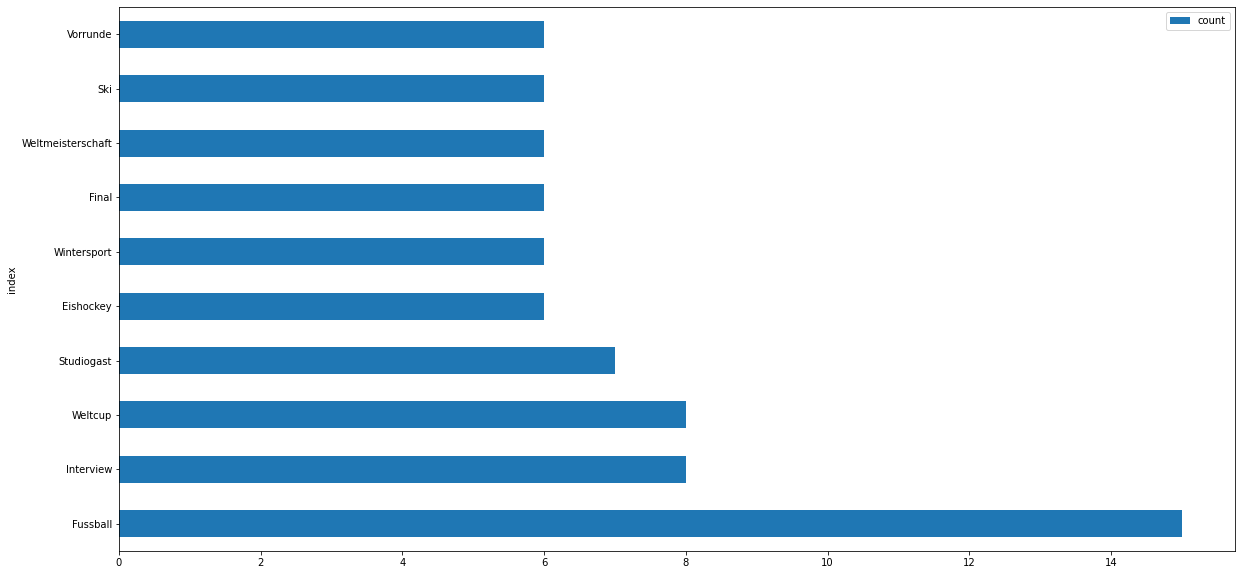

In [64]:
# Top 10 Keywords
(df2
 .bTit
 .str.get_dummies(sep=" ")               # split all titles by space and get occurrences as dummy pairs (word:1)
 .sum()                                  # sum word occurrences 
 .to_frame()                             # convert series to dataframe
 .reset_index()                          # reset index to get index as str
 .rename(columns = {0:'count'})          # rename 
 .query('index.str.istitle()')           # filter out all capitalized words
 .sort_values('count', ascending=False)  # sort by occurrence
 .head(10)                               # pick top 10
 .plot.barh(x='index', y='count')        # plot bar chart
)